In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Color Explanations

<div class="alert alert-block alert-success">

Green boxes: Assumptions made about the model or explanations



<div class="alert alert-block alert-danger">

Red boxes: To do

<div class="alert alert-block alert-info">

Blue boxes: Ideas of what we can implement 

## Model 1: Directed Weighted Network

<div class="alert alert-block alert-success">

Function used: DiGraph

Pros: Easy to implement 

Cons: The main part of the graph doesn't really use the network, it's just for visualization. 

We're using weighted edges, which we haven't really focused on in class so calculating degree centrality could be tricky

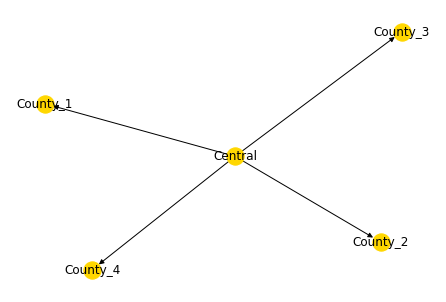

In [2]:
network = nx.DiGraph()

network.add_edge("Central", "County_1")
network.add_edge("Central", "County_2")
network.add_edge("Central", "County_3")
network.add_edge("Central", "County_4")

nx.draw_spring(network, node_color = "gold", with_labels = True)

In [4]:
# The population of the counties 
County_1_pop = 100 
County_2_pop = 30
County_3_pop = 50
County_4_pop = 70

<div class="alert alert-block alert-success">

Assumption made: Covid starts in Central LA and spreads out. In other words, new infections only come from central LA. 

This mean once people get Covid, they stay at home and don't come into work.

In [6]:
# Number of people who commute from each county to Central LA 
# Values all made up
County_1_weight = 70 
County_2_weight = 25
County_3_weight = 45
County_4_weight = 35

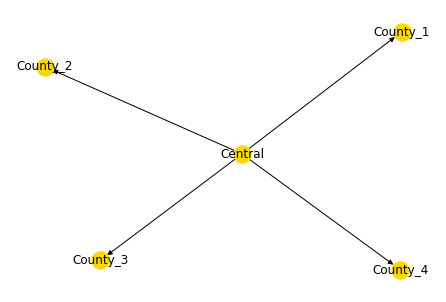

In [9]:
network_weights = nx.DiGraph()


network_weights.add_weighted_edges_from([("Central", "County_1",County_1_weight)], weight = "Commuters")
network_weights.add_weighted_edges_from([("Central", "County_2",County_2_weight)], weight = "Commuters")
network_weights.add_weighted_edges_from([("Central", "County_3",County_3_weight)], weight = "Commuters")
network_weights.add_weighted_edges_from([("Central", "County_4",County_4_weight)], weight = "Commuters")


nx.draw(network, node_color = "gold", with_labels = True)

<div class="alert alert-block alert-danger">

To do: Find a way to show the weights of the edges if we end up using this

In [11]:
Infection_rate = 0.05

In [18]:
# Create a time series using only do County_1 for example

County_1_infections = 0

County_1_non_infections = County_1_pop


County_1_commuters = County_1_weight

time = (0,1,2,3,4) # Number of iterations to go through

# Could have used numpy here to save the values 
for i in time: 
    print("iteration",i)
    
    # Counties go to work and get infected
    County_1_infections = County_1_infections + round(County_1_commuters * Infection_rate)
    print("Number of infections in county 1:", County_1_infections)
    County_1_non_infections = County_1_non_infections - County_1_infections
    print("Number of non-infections in county 1:", County_1_non_infections)
    
    # The infected people do not go to work 
    County_1_commuters = County_1_commuters - County_1_infections
    print("Number of people who do go to work in county 1:", County_1_commuters)


iteration 0
Number of infections in county 1: 4
Number of non-infections in county 1: 96
Number of people who do go to work in county 1: 66
iteration 1
Number of infections in county 1: 7
Number of non-infections in county 1: 89
Number of people who do go to work in county 1: 59
iteration 2
Number of infections in county 1: 10
Number of non-infections in county 1: 79
Number of people who do go to work in county 1: 49
iteration 3
Number of infections in county 1: 12
Number of non-infections in county 1: 67
Number of people who do go to work in county 1: 37
iteration 4
Number of infections in county 1: 14
Number of non-infections in county 1: 53
Number of people who do go to work in county 1: 23


<div class="alert alert-block alert-danger">

Need to adjust it so that after a week the infected people fall into another category called something like "Already been sick"  
Might need to add how people coming back from work affect more people in the county

<div class="alert alert-block alert-info">

Idea: The focus of our model can be to answer the question "If we hadn't shut down, what would have happened?" 
In this scenario, people wouldn't work from home unless they have Covid. To make the model easier, we can make the assumption that people quarantine the second they got Covid. 

In [ ]:
# Now try applying this logic with the number of edges in a graph 
# Why would we want to do this? It might be easier to calculate degree centrality for non-weighted edges 

## Model 2: Undirected Network

<div class="alert alert-block alert-success">

Now try applying the idea of the model above with the number of edges in a graph.
    
Why would we want to do this? It might be easier to calculate degree centrality for non-weighted edges. 

Model assumption: People who go to work each day go back to the same county 

Degree of County_1: 10
Degree of County_2: 1
Degree of Central: 11


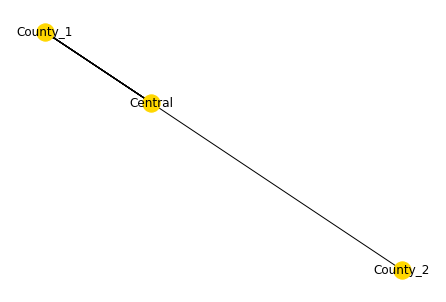

In [28]:
network_multi_edges = nx.MultiGraph()

commuters = 10

# This is the only way I could figure out how to add multiple edges between 2 nodes
for i in range(10):                          
    network_multi_edges.add_edge("Central", "County_1")
    
network_multi_edges.add_edge("Central", "County_2")
    
print("Degree of County_1:", network_multi_edges.degree("County_1"))
print("Degree of County_2:", network_multi_edges.degree("County_2"))
print("Degree of Central:", network_multi_edges.degree("Central"))


nx.draw(network_multi_edges, node_color = "gold", with_labels = True)

<div class="alert alert-block alert-danger">

To do: See if there's a way to add multi-edges without using a loop 

Iteration 1
Number of infections in county 1: 2
Number of non-infections in county 1: 98

Number of people who do go to work in county 1: 8

Degree of County_1: 8
Degree of County_2: 1
Degree of Central: 9


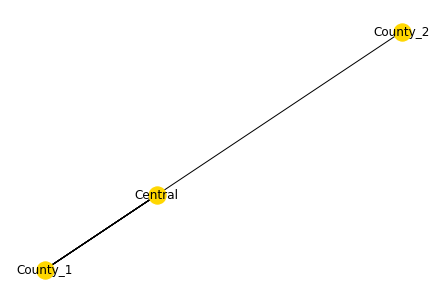

In [29]:
# Have the condition above be our initial condition with only 10 commuters 

County_1_infections = 0

County_1_non_infections = County_1_pop

County_1_commuters = commuters

new_infection_rate = 0.2



# Just do one iteration for example 
print("Iteration 1")
    
# Counts go to work and get infected
County_1_infections = County_1_infections + round(County_1_commuters * new_infection_rate)
print("Number of infections in county 1:", County_1_infections)
County_1_non_infections = County_1_non_infections - County_1_infections
print("Number of non-infections in county 1:", County_1_non_infections)

print("")


# The infected people do not go to work 
County_1_commuters = County_1_commuters - County_1_infections
print("Number of people who do go to work in county 1:", County_1_commuters)

print("")
    
# County_1 has 2 infections 

# The updated network of people who will go to work 
for i in range(2): 
    network_multi_edges.remove_edge("Central", "County_1")
    
print("Degree of County_1:", network_multi_edges.degree("County_1"))
print("Degree of County_2:", network_multi_edges.degree("County_2"))
print("Degree of Central:", network_multi_edges.degree("Central"))


nx.draw(network_multi_edges, node_color = "gold", with_labels = True)